# acquire

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr
from scipy import stats

import prepare
import acquire
import model

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

seed = 42

In [2]:
#df1 = pd.read_csv('winequality-red.csv')

In [3]:
#df2 = pd.read_csv('winequality-white.csv')

# prepare

In [4]:
#df1.head()

In [5]:
#df1['quality'].unique()

In [6]:
#df2['quality'].unique()

In [7]:
#df1['wine_type'] = 'red'

In [8]:
#df2['wine_type'] = 'white'

In [9]:
#wine = pd.concat([df1, df2])

In [10]:
#wine.to_csv('wine_quality.csv')

In [11]:
#wine.head()

- There are no null values in either csv.

- quality is the target variable here, and it is a range from 3-9

- removal of outliers got rid of about 600 rows



In [12]:
#wine = wine.rename(columns= {'fixed acidity': 'fixed_acidity',
#             'volatile acidity': 'volatile_acidity',
#             'citric acid': 'citric_acid',
3             'residual sugar': 'residual_sugar',
#             'free sulfur dioxide': 'free_sulfur_dioxide',
#             'total sulfur dioxide': 'total_sulfur_dioxide'})

SyntaxError: invalid syntax (1906590675.py, line 4)

In [ ]:
def get_wine():
    
    df = pd.read_csv('wine_quality.csv')
    
    df = df.rename(columns= {'fixed acidity': 'fixed_acidity',
             'volatile acidity': 'volatile_acidity',
             'citric acid': 'citric_acid',
             'residual sugar': 'residual_sugar',
             'free sulfur dioxide': 'free_sulfur_dioxide',
             'total sulfur dioxide': 'total_sulfur_dioxide'})
    
    return df

In [2]:
df = acquire.get_wine()

In [15]:
def remove_outliers(df, k, col_list):
    ''' 
    This function takes in a dataframe, the threshold and a list of columns 
    and returns the dataframe with outliers removed
    '''   
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [16]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulphur_dioxide', 'total_sulphur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [3]:
cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulphur_dioxide', 'total_sulphur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df = prepare.remove_outliers(df, 2.5, cols)

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red


In [5]:
def inertial_dampening(df, cols, num=11):
    
    inertia = []
    seed = 42

    for n in range(1, num):
    
        kmeans = KMeans(n_clusters=n, random_state=seed)
    
        kmeans.fit(df[cols])
    
        inertia.append(kmeans.inertia_)
        
    results_df = pd.DataFrame({'n_clusters': list(range(1,num)),
              'inertia': inertia})

    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    sns.relplot(data=results_df, x='n_clusters', y='inertia', kind='line', marker='x')

    plt.xticks(range(1, num))
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Change in inertia as number of clusters increase')
    plt.show()

# explore

- fixed vs volatile acidity

- risidual suger vs wine quality (target)

- ph vs alcohol lvl

- how many wines do we have of each quality

- sulphates and quality

- sulfur dioxide vs sulphates

- wine type quality

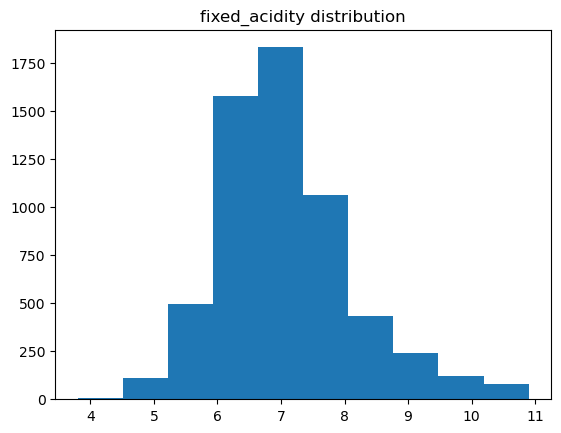

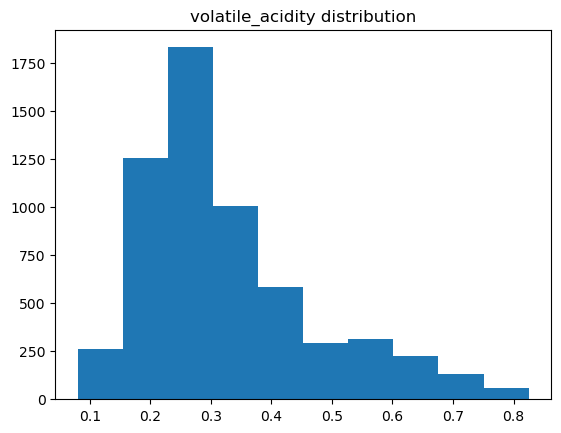

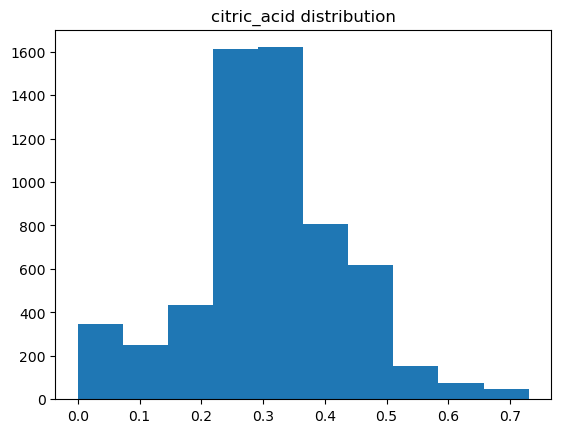

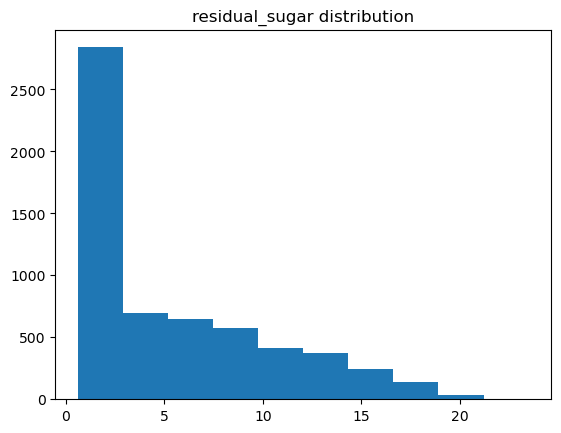

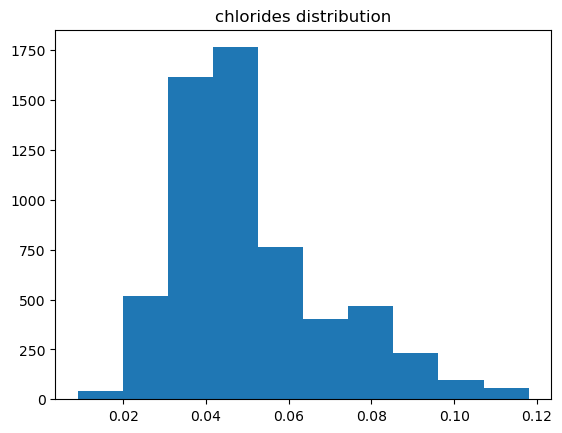

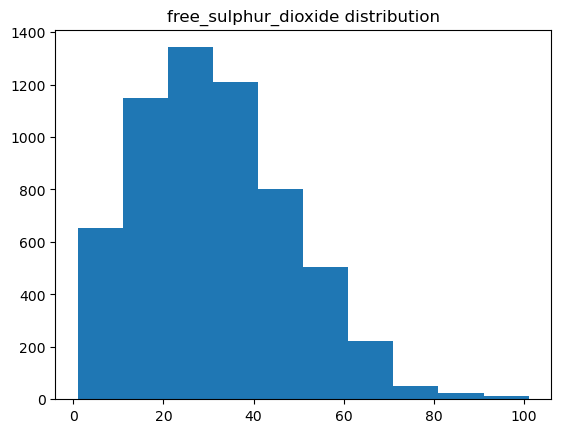

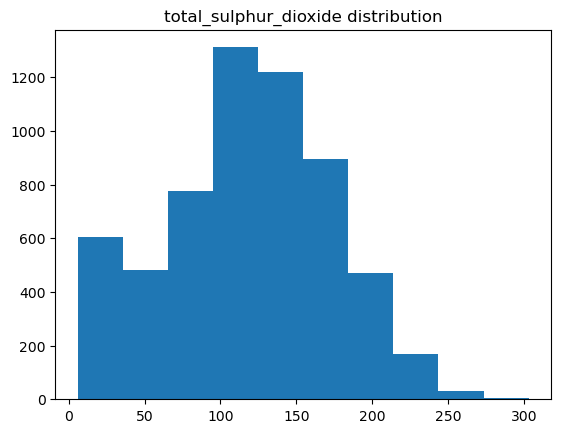

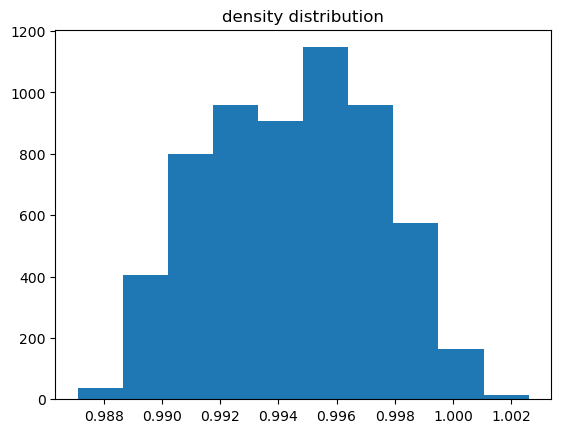

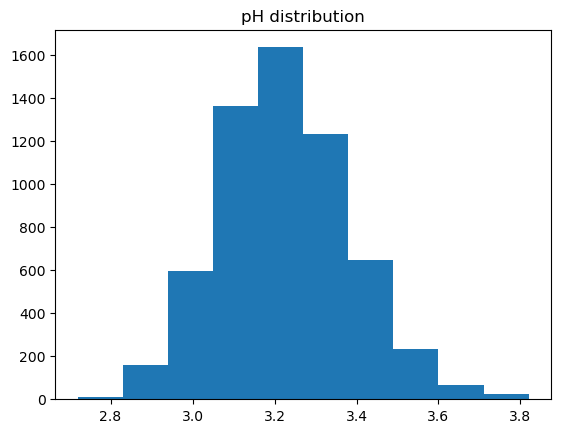

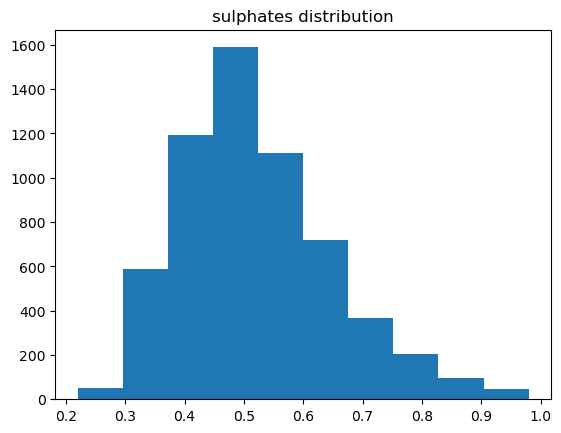

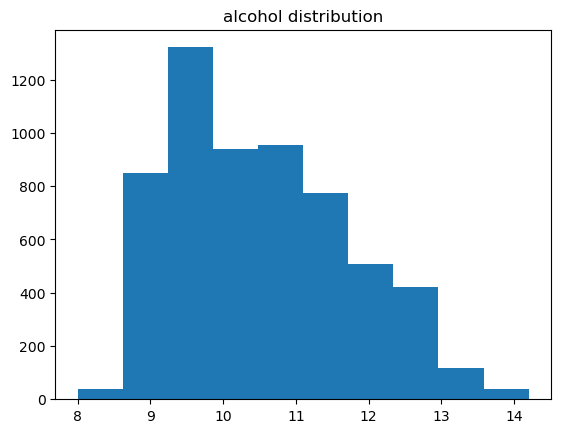

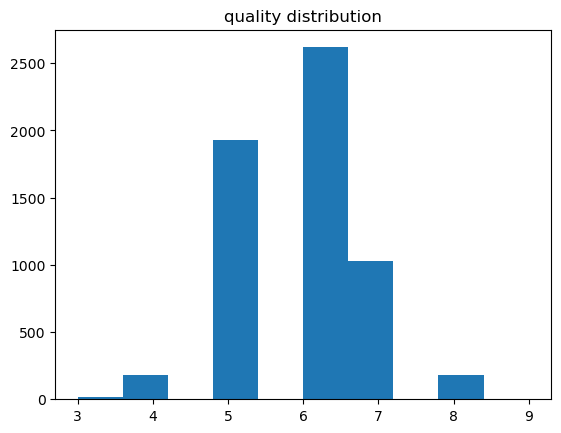

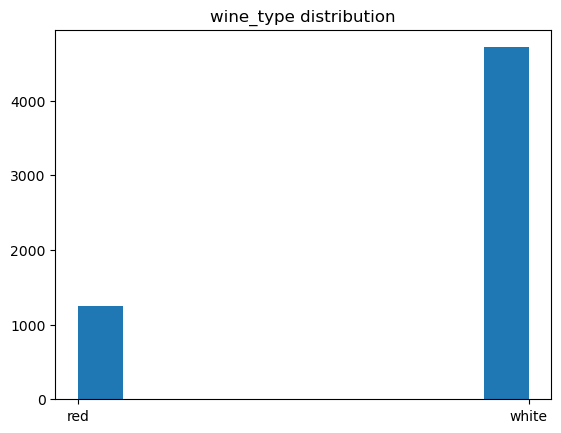

In [24]:
for col in df.columns:
    
    plt.hist(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()

In [6]:
train, validate, test = prepare.subset_df(df)

(3577, 13) (1193, 13) (1193, 13)


In [7]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
4890,5.6,0.120,0.33,2.9,0.044,21.0,73.0,0.98896,3.17,0.32,12.9,8,white
4180,6.8,0.180,0.30,12.8,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,7,white
1615,6.3,0.480,0.04,1.1,0.046,30.0,99.0,0.99280,3.24,0.36,9.6,6,white
1292,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6,red
4143,6.9,0.320,0.30,1.8,0.036,28.0,117.0,0.99269,3.24,0.48,11.0,6,white


## fixed acidity vs volatile acidity

$H_0$ : There is no relationship

$H_a$ : There *is* some kind of relationship

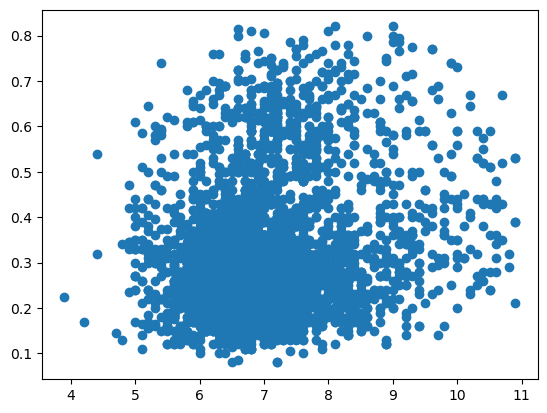

In [28]:
plt.scatter(data=train, x='fixed_acidity', y='volatile_acidity')
plt.show()

In [49]:
def spearmanr_report(group1, group2):
    '''
    This function takes in two groups (columns), and will perform a spearman r test on them and print out the t-statistic and p-value, as well as determine if the p-value is lower than a predetermined (.05) alpha
    '''
    t, p = stats.spearmanr(group1, group2)

    alpha = .05
    seed = 42

    print(f'T-statistic = {t:.4f}') 
    print(f'p-value     = {p:.4f}')

    print('Is p-value < alpha?', p < alpha)

In [44]:
def pearsonr_report(group1, group2):
    '''
    This function takes in two groups (columns), and will perform an independent t-test on them and print out the t-statistic and p-value, as well as determine if the p-value is lower than a predetermined (.05) alpha
    '''
    t, p = stats.pearsonr(group1, group2)

    alpha = .05
    seed = 42

    print(f'T-statistic = {t:.4f}') 
    print(f'p-value     = {p:.4f}')

    print('Is p-value < alpha?', p < alpha)

In [29]:
alpha = .05

corr, p = pearsonr(x=train['fixed_acidity'], y=train['volatile_acidity'])

In [46]:
pearsonr_report(train['fixed_acidity'], train['volatile_acidity'])

T-statistic = 0.1968
p-value     = 0.0000
Is p-value < alpha? True


In [31]:
p < alpha

True

Fixed and Volatile acidities *are* correlation to eachother

## free sulphur dioxide vs total sulphur dioxide

$H_0$: There is no relationship

$H_a$: There *is* a relationship

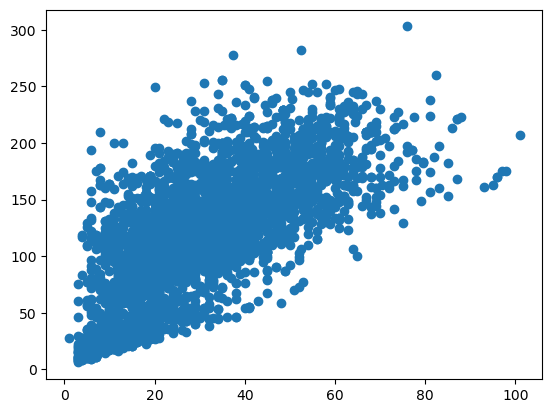

In [32]:
plt.scatter(data=train, x='free_sulphur_dioxide', y='total_sulphur_dioxide')
plt.show()

In [33]:
alpha = .05

corr, p = pearsonr(x=train['free_sulphur_dioxide'], y=train['total_sulphur_dioxide'])

In [34]:
corr, p

(0.7046804491912984, 0.0)

In [35]:
p < alpha

True

As with the acidity, there is a clear correlation here between total and free sulphur dioxide.

### sulphates vs free and total sulphur dioxides

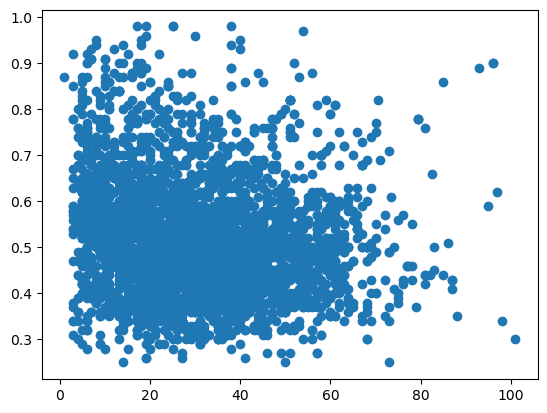

In [47]:
plt.scatter(data=train, x='free_sulphur_dioxide', y='sulphates')
plt.show()

In [50]:
pearsonr_report(train['sulphates'], train['free_sulphur_dioxide'])

T-statistic = -0.1467
p-value     = 0.0000
Is p-value < alpha? True


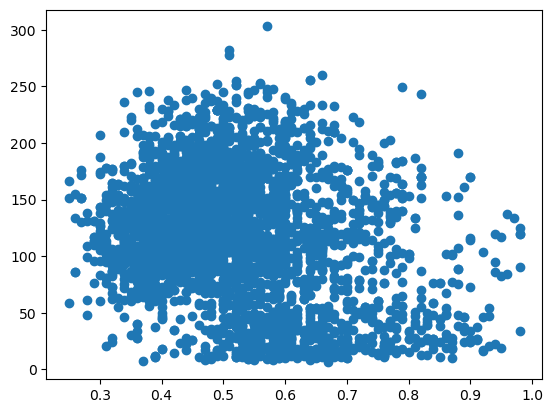

In [48]:
plt.scatter(data=train, x='sulphates', y='total_sulphur_dioxide')
plt.show()

In [51]:
pearsonr_report(train['sulphates'], train['total_sulphur_dioxide'])

T-statistic = -0.2495
p-value     = 0.0000
Is p-value < alpha? True


There seems to be a negative correlation between sulphates **and** free sulphur dioxde and between sulphates and total sulphur dioxide

## sugars vs wine quality

$H_0$: There is no significant relationship between residual sugar level and wine quality

$H_a$: There *is* a significant relationship between residual sugars and wine quality

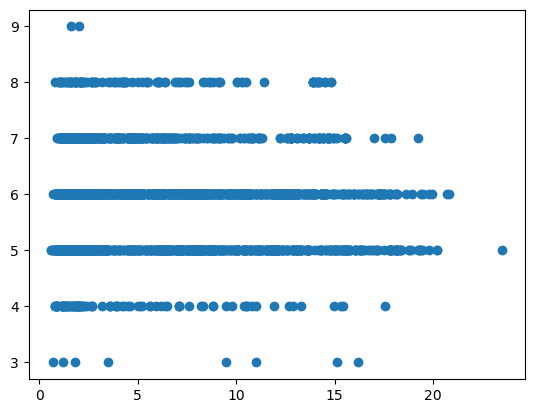

In [37]:
plt.scatter(data=train, x='residual_sugar', y='quality')
plt.show()

In [40]:
def ind_ttest_report(group1, group2):
    '''
    This function takes in two groups (columns), and will perform an independent t-test on them and print out the t-statistic and p-value, as well as determine if the p-value is lower than a predetermined (.05) alpha
    '''
    t, p = stats.ttest_ind(group1, group2, equal_var=False)

    alpha = .05
    seed = 42

    print(f'T-statistic = {t:.4f}') 
    print(f'p-value     = {p:.4f}')

    print('Is p-value < alpha?', p < alpha)

In [41]:
ind_ttest_report(train['residual_sugar'], train['quality'])

T-statistic = -3.0581
p-value     = 0.0022
Is p-value < alpha? True


In [42]:
def mannwhitney_report(group1, group2):
    '''
    This function takes in two groups (columns), and will perform an independent t-test on them and print out the t-statistic and p-value, as well as determine if the p-value is lower than a predetermined (.05) alpha
    '''
    t, p = stats.mannwhitneyu(group1, group2)

    alpha = .05
    seed = 42

    print(f'T-statistic = {t:.4f}') 
    print(f'p-value     = {p:.4f}')

    print('Is p-value < alpha?', p < alpha)

In [43]:
mannwhitney_report(train['residual_sugar'], train['quality'])

T-statistic = 4871613.5000
p-value     = 0.0000
Is p-value < alpha? True


Judging by my nonparametric correlation statistical test (mannwhitneyu) there is a very significant relationship here

In [52]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
4890,5.6,0.120,0.33,2.9,0.044,21.0,73.0,0.98896,3.17,0.32,12.9,8,white
4180,6.8,0.180,0.30,12.8,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,7,white
1615,6.3,0.480,0.04,1.1,0.046,30.0,99.0,0.99280,3.24,0.36,9.6,6,white
1292,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6,red
4143,6.9,0.320,0.30,1.8,0.036,28.0,117.0,0.99269,3.24,0.48,11.0,6,white


## citric acid vs ph lvls

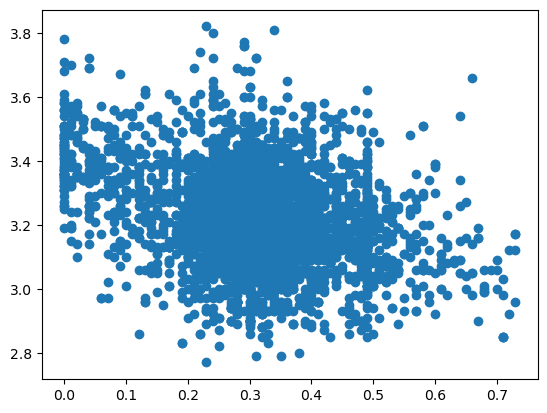

In [54]:
plt.scatter(data=train, x='citric_acid', y='pH')
plt.show()

In [55]:
pearsonr_report(train['citric_acid'], train['pH'])

T-statistic = -0.3026
p-value     = 0.0000
Is p-value < alpha? True


There seems to be a negative correlation between citric acid levels and pH

## density vs quality

$H_0$: There is no relationship between density and quality.

$H_a$: There *is* a relationship betwen density and quality.

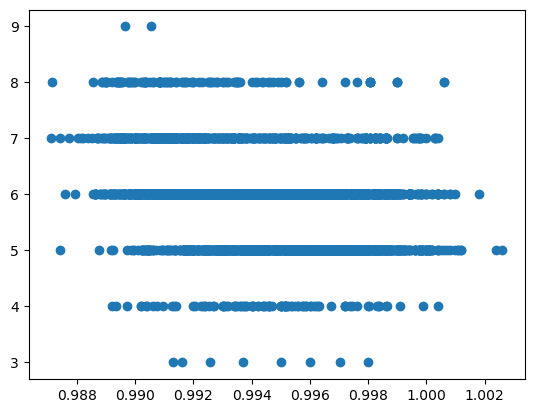

In [57]:
plt.scatter(data=train, x='density', y='quality')

plt.show()

In [58]:
mannwhitney_report(train['density'], train['quality'])

T-statistic = 0.0000
p-value     = 0.0000
Is p-value < alpha? True


There is no relationship between density and wine quality

<div class="alert alert-block alert-info">
<b>Takeaways:</b> 
    
- Fixed acidity and volatile acidity have a relationship with each other
    
- Free sulphur dioxide and total sulphur dioxide have a relatioship with eachother, while both of those features are also negatively correlated to the sulphates feature
    
- residual sugar levels are strongly related to wine quality
    
- citric acid and pH levels have a medium-low negative correlation with each other
    
- Density does not have a relationship with wine quality

# modeling (clustering)

In [59]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
4890,5.6,0.120,0.33,2.9,0.044,21.0,73.0,0.98896,3.17,0.32,12.9,8,white
4180,6.8,0.180,0.30,12.8,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,7,white
1615,6.3,0.480,0.04,1.1,0.046,30.0,99.0,0.99280,3.24,0.36,9.6,6,white
1292,5.9,0.395,0.13,2.4,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6,red
4143,6.9,0.320,0.30,1.8,0.036,28.0,117.0,0.99269,3.24,0.48,11.0,6,white


In [8]:
cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulphur_dioxide',
        'total_sulphur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

train_scaled, validate_scaled, test_scaled = prepare.scale_data(train, validate, test, MinMaxScaler(), cols)


In [9]:
train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
4890,0.242857,0.054054,0.452055,0.100437,0.321101,0.20,0.225589,0.119432,0.380952,0.095890,0.803571,8,white
4180,0.414286,0.135135,0.410959,0.532751,0.486239,0.18,0.555556,0.708199,0.219048,0.369863,0.107143,7,white
1615,0.342857,0.540541,0.054795,0.021834,0.339450,0.29,0.313131,0.367334,0.447619,0.150685,0.214286,6,white
1292,0.285714,0.425676,0.178082,0.078603,0.431193,0.13,0.074074,0.420271,0.809524,0.575342,0.714286,6,red
4143,0.428571,0.324324,0.410959,0.052402,0.247706,0.27,0.373737,0.360232,0.447619,0.315068,0.464286,6,white


## Cluster #1 : fixed and volatile acidities

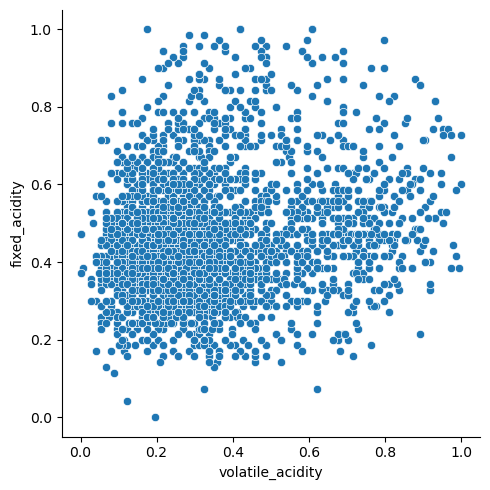

In [63]:
sns.relplot(data=train_scaled, x='volatile_acidity', y='fixed_acidity')

In [65]:
cols = ['volatile_acidity', 'fixed_acidity']

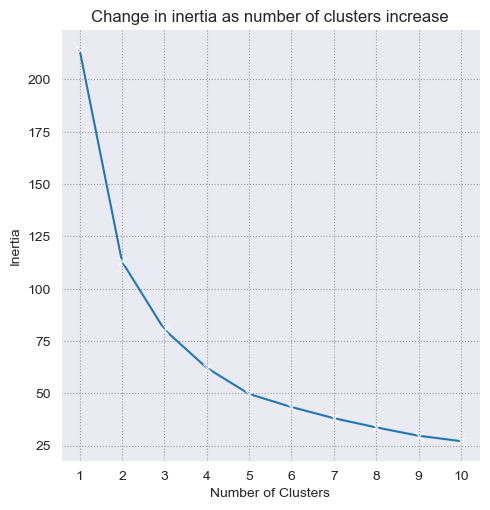

In [66]:
inertial_dampening(train_scaled, cols)

Using the elbow method here, I would say 3 clusters has the best performance, with maybe 4 as second best.

In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = model.xy_subsets(train_scaled, validate_scaled, test_scaled, 'quality')

In [15]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,wine_type
4890,0.242857,0.054054,0.452055,0.100437,0.321101,0.20,0.225589,0.119432,0.380952,0.095890,0.803571,white
4180,0.414286,0.135135,0.410959,0.532751,0.486239,0.18,0.555556,0.708199,0.219048,0.369863,0.107143,white
1615,0.342857,0.540541,0.054795,0.021834,0.339450,0.29,0.313131,0.367334,0.447619,0.150685,0.214286,white
1292,0.285714,0.425676,0.178082,0.078603,0.431193,0.13,0.074074,0.420271,0.809524,0.575342,0.714286,red
4143,0.428571,0.324324,0.410959,0.052402,0.247706,0.27,0.373737,0.360232,0.447619,0.315068,0.464286,white


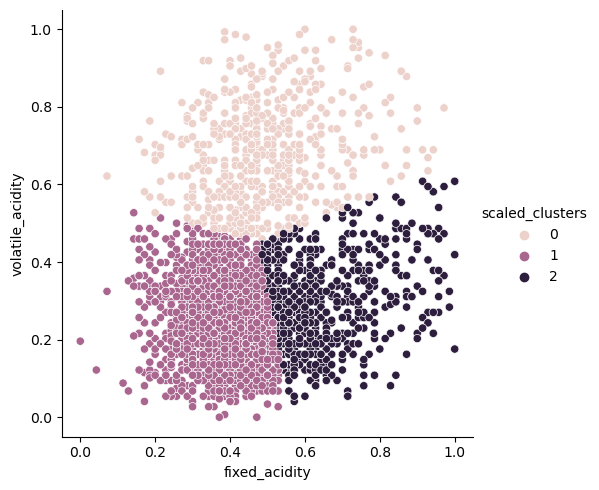

In [21]:
kmeans = KMeans(n_clusters=3, random_state=seed)
kmeans.fit(X_train[['fixed_acidity', 'volatile_acidity']])
X_train['scaled_clusters'] = kmeans.predict(X_train[['fixed_acidity', 'volatile_acidity']])

sns.relplot(data=X_train, x='fixed_acidity', y='volatile_acidity', hue='scaled_clusters')
plt.show()

In [47]:
X_validate['scaled_clusters'] = kmeans.predict(X_validate[['fixed_acidity', 'volatile_acidity']])
X_validate.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,wine_type,sulphur_dioxide_clusters,scaled_clusters
5030,0.457143,0.135135,0.534247,0.639738,0.348624,0.797289,0.542857,0.712329,0.125000,white,1,0
1421,0.514286,0.432432,0.246575,0.043668,0.642202,0.606198,0.542857,0.452055,0.178571,red,2,1
5526,0.371429,0.189189,0.424658,0.144105,0.339450,0.249839,0.361905,0.082192,0.553571,white,0,0
1315,0.514286,0.743243,0.369863,0.061135,0.678899,0.584248,0.466667,0.452055,0.250000,red,2,1
4702,0.442857,0.229730,0.616438,0.074236,0.330275,0.227889,0.371429,0.315068,0.625000,white,0,0


In [48]:
X_validate = X_validate.rename(columns= {'scaled_clusters': 'acidity_areas'})

In [ ]:
X_validate = X_validate.drop(columns=['fixed_acidity', 'volatile_acidity'])

In [51]:
X_validate.head()

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,wine_type,sulphur_dioxide_clusters,acidity_areas
5030,0.534247,0.639738,0.348624,0.797289,0.542857,0.712329,0.125000,white,1,0
1421,0.246575,0.043668,0.642202,0.606198,0.542857,0.452055,0.178571,red,2,1
5526,0.424658,0.144105,0.339450,0.249839,0.361905,0.082192,0.553571,white,0,0
1315,0.369863,0.061135,0.678899,0.584248,0.466667,0.452055,0.250000,red,2,1
4702,0.616438,0.074236,0.330275,0.227889,0.371429,0.315068,0.625000,white,0,0


In [53]:
X_test['scaled_clusters'] = kmeans.predict(X_test[['fixed_acidity', 'volatile_acidity']])
X_test.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,wine_type,scaled_clusters
5465,0.642857,0.202703,0.438356,0.030568,0.357798,0.58,0.360269,0.301485,0.314286,0.410959,0.464286,white,1


In [54]:
X_test = X_test.rename(columns= {'scaled_clusters': 'acidity_areas'})

In [55]:
X_test = X_test.drop(columns=['fixed_acidity', 'volatile_acidity'])

In [56]:
X_test.head(1)

,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,wine_type,acidity_areas
5465,0.438356,0.030568,0.357798,0.58,0.360269,0.301485,0.314286,0.410959,0.464286,white,1


In [25]:
X_train = X_train.rename(columns= {'scaled_clusters': 'acidity_areas'})

In [29]:
X_train = X_train.drop(columns=['fixed_acidity', 'volatile_acidity'])

In [30]:
X_train.head()

,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,wine_type,acidity_areas
4890,0.452055,0.100437,0.321101,0.20,0.225589,0.119432,0.380952,0.095890,0.803571,white,1
4180,0.410959,0.532751,0.486239,0.18,0.555556,0.708199,0.219048,0.369863,0.107143,white,1
1615,0.054795,0.021834,0.339450,0.29,0.313131,0.367334,0.447619,0.150685,0.214286,white,0
1292,0.178082,0.078603,0.431193,0.13,0.074074,0.420271,0.809524,0.575342,0.714286,red,1
4143,0.410959,0.052402,0.247706,0.27,0.373737,0.360232,0.447619,0.315068,0.464286,white,1


## Cluster #2 : free and total sulphur dioxides

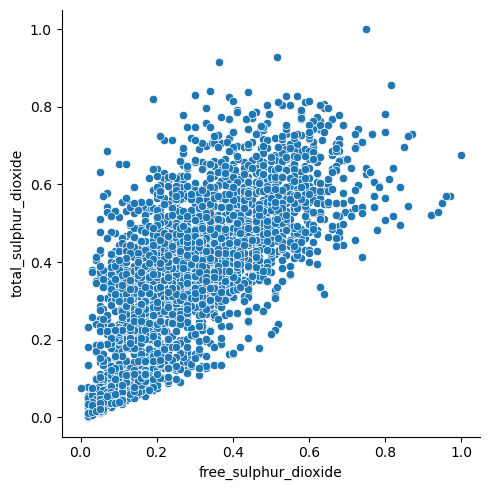

In [33]:
sns.relplot(data=train_scaled, x='free_sulphur_dioxide', y='total_sulphur_dioxide')

plt.show()

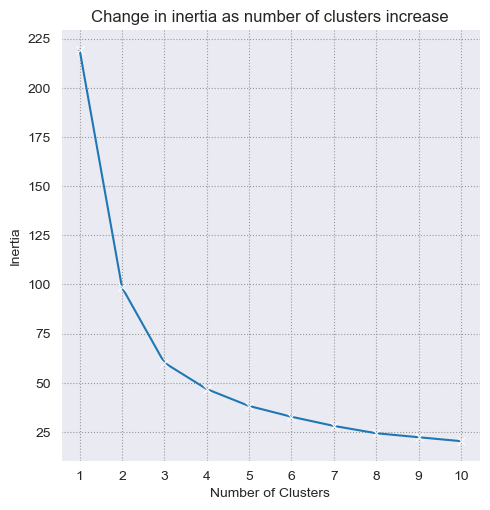

In [34]:
cols = ['free_sulphur_dioxide', 'total_sulphur_dioxide']

model.inertial_dampening(X_train, cols)

Using the elbow method here, 3 clusters seems to be the best fit here as well

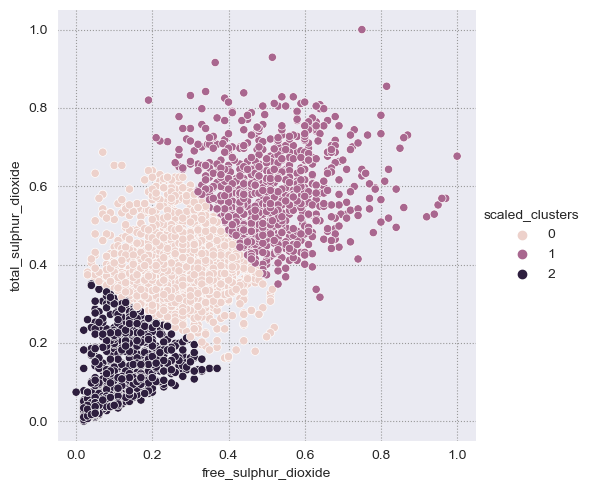

In [40]:
kmeans = KMeans(n_clusters=3, random_state=seed)
kmeans.fit(X_train[['free_sulphur_dioxide', 'total_sulphur_dioxide']])
X_train['scaled_clusters'] = kmeans.predict(X_train[['free_sulphur_dioxide', 'total_sulphur_dioxide']])

sns.relplot(data=X_train, x='free_sulphur_dioxide', y='total_sulphur_dioxide', hue='scaled_clusters')
plt.show()

In [42]:
X_train = X_train.rename(columns= {'scaled_clusters': 'sulphur_dioxide_clusters'})

In [44]:
X_train = X_train.drop(columns=['free_sulphur_dioxide', 'total_sulphur_dioxide'])

In [45]:
X_train.head()

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,wine_type,acidity_areas,sulphur_dioxide_clusters
4890,0.452055,0.100437,0.321101,0.119432,0.380952,0.095890,0.803571,white,1,2
4180,0.410959,0.532751,0.486239,0.708199,0.219048,0.369863,0.107143,white,1,0
1615,0.054795,0.021834,0.339450,0.367334,0.447619,0.150685,0.214286,white,0,0
1292,0.178082,0.078603,0.431193,0.420271,0.809524,0.575342,0.714286,red,1,2
4143,0.410959,0.052402,0.247706,0.360232,0.447619,0.315068,0.464286,white,1,0


In [ ]:
X_validate['scaled_clusters'] = kmeans.predict(X_validate[['free_sulphur_dioxide', 'total_sulphur_dioxide']])

X_validate = X_validate.rename(columns= {'scaled_clusters': 'sulphur_dioxide_clusters'})
X_validate = X_validate.drop(columns=['free_sulphur_dioxide', 'total_sulphur_dioxide'])

In [52]:
X_validate.head()

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,wine_type,sulphur_dioxide_clusters,acidity_areas
5030,0.534247,0.639738,0.348624,0.797289,0.542857,0.712329,0.125000,white,1,0
1421,0.246575,0.043668,0.642202,0.606198,0.542857,0.452055,0.178571,red,2,1
5526,0.424658,0.144105,0.339450,0.249839,0.361905,0.082192,0.553571,white,0,0
1315,0.369863,0.061135,0.678899,0.584248,0.466667,0.452055,0.250000,red,2,1
4702,0.616438,0.074236,0.330275,0.227889,0.371429,0.315068,0.625000,white,0,0


In [58]:
X_test['scaled_clusters'] = kmeans.predict(X_test[['free_sulphur_dioxide', 'total_sulphur_dioxide']])

X_test = X_test.rename(columns= {'scaled_clusters': 'sulphur_dioxide_clusters'})
X_test = X_test.drop(columns=['free_sulphur_dioxide', 'total_sulphur_dioxide'])

In [62]:
X_test.head(1)

,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol,wine_type,acidity_areas,sulphur_dioxide_clusters
5465,0.438356,0.030568,0.357798,0.301485,0.314286,0.410959,0.464286,white,1,1
